# CIFAR-10 Classification 

## Introduction 

Building a Convolutional Neural Network for image classification problem. The dataset used in this notebook is CIFAR-10 from Keras dataset. 

## Objectives 

Gradually building CNN from very basic and simple to more complex until accuracy hit at least 90%. 

## Importing Modules and Data 

The data is imported from Keras dataset. 

In [1]:
from tensorflow.keras.datasets import cifar10 

from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout, Flatten, Dense 
from tensorflow.keras.callbacks import Callback 

import math 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(f'There are {len(x_train)} training instances') 
print(f'There are {len(x_test)} testing instances') 
print(f'Training image shape: {x_train.shape}') 
print(f'Testing image shape: {x_test.shape}') 

There are 50000 training instances
There are 10000 testing instances
Training image shape: (50000, 32, 32, 3)
Testing image shape: (10000, 32, 32, 3)


In [4]:
# Normalizing the pixels values in all images 
x_train = x_train/255.0 
x_test = x_test/255.0 

In [5]:
# One-hot encode image labels 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [35]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

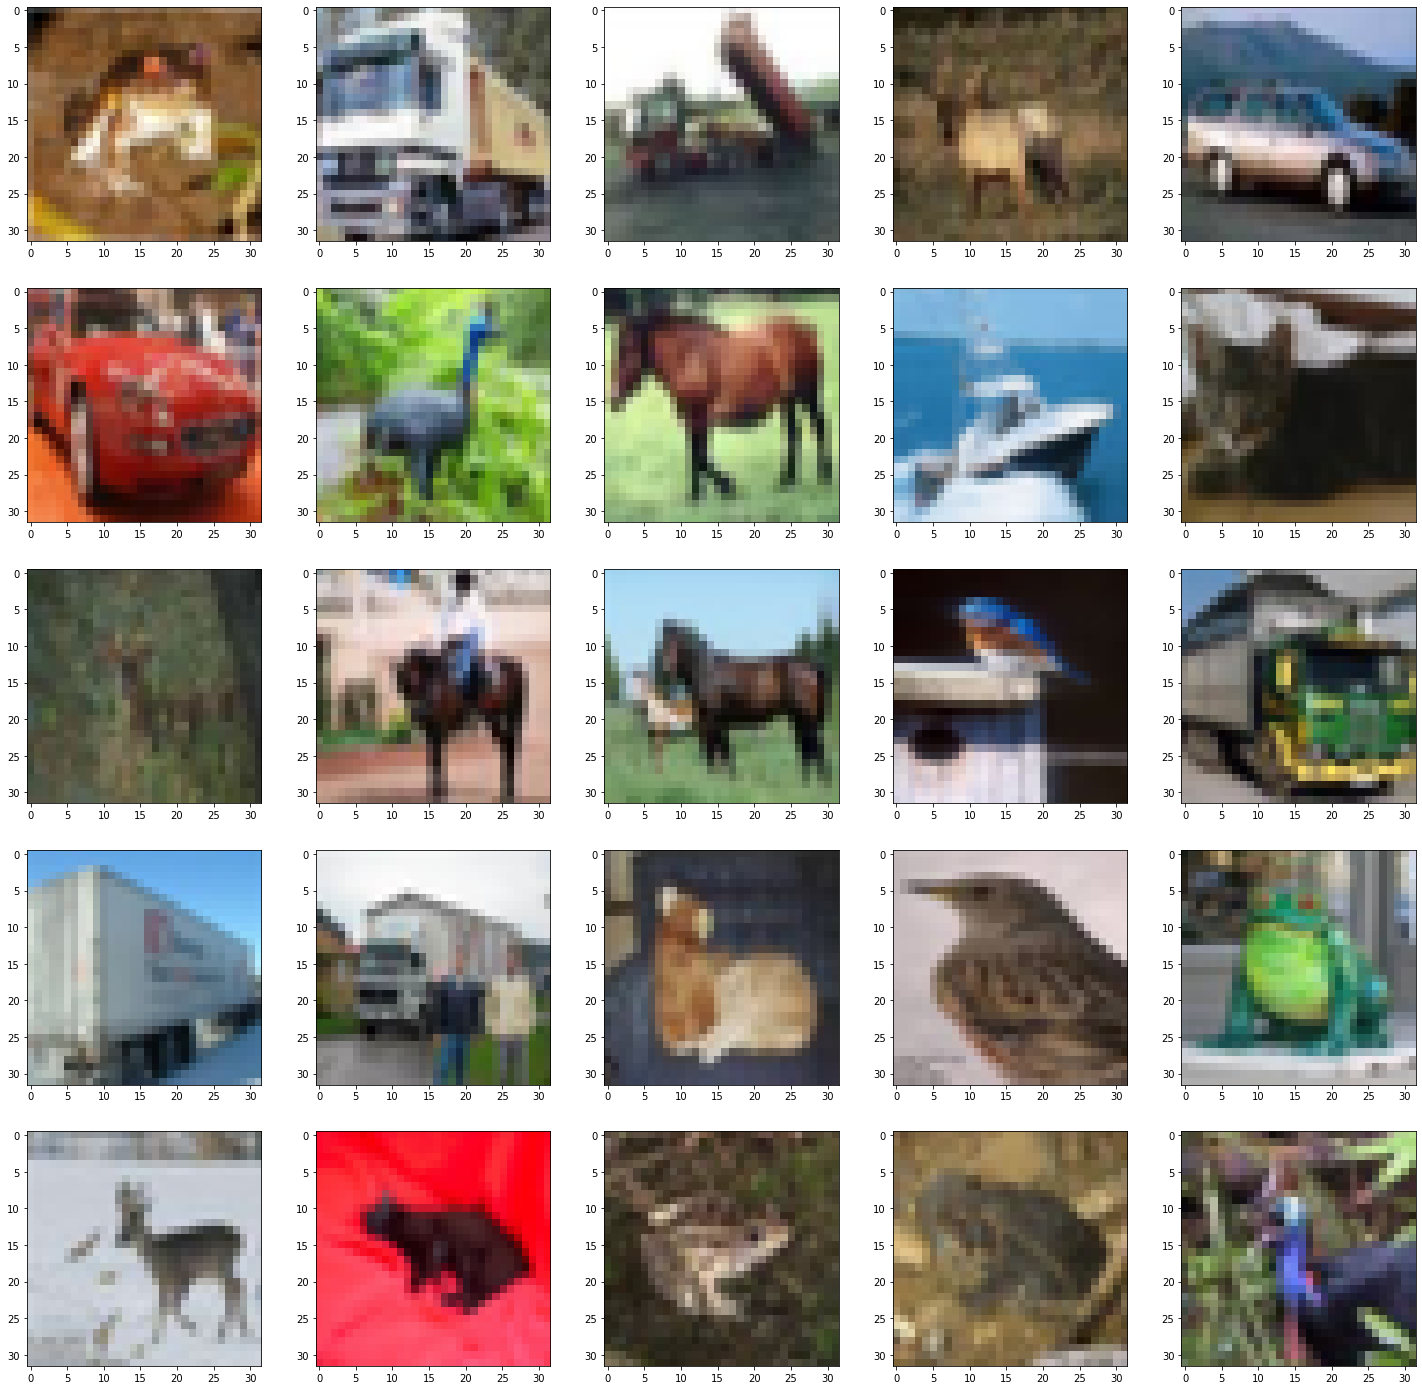

In [6]:
# Showing images from training dataset 
nrow = 5 
ncol = 5 

fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*5, ncol*5)) 
count = 0
for i in range(nrow): 
    for j in range(ncol): 
        ax[i,j ].imshow(x_train[count]) 
        count += 1


# Training CNN models 

- Defining callback class to stop training when training accuracy has reached 95%. 
- Defining accuracy and loss plot for training and validation. 
- Gradually building model architecture while looking at accuracy and loss by adding more layers of convolutional, applying dropout and batch normalization for reducing overfitting. 

In [7]:
class myCallback(Callback): 
    def on_epoch_end(self, epoch, log={}): 
        if (log.get('accuracy') > 0.95): 
            print(f'\nAccuracy reached 95%, stop training!') 
            self.model.stop_training = True 

callback = myCallback()

In [8]:
def acc_loss_plot(history): 
  acc = history.history['accuracy'] 
  loss = history.history['loss'] 
  val_acc = history.history['val_accuracy'] 
  val_loss = history.history['val_loss'] 

  plt.plot(acc) 
  plt.plot(val_acc) 
  plt.title('Training and validation accuracy') 
  plt.figure() 

  plt.plot(loss) 
  plt.plot(val_loss) 
  plt.title('Training and validation loss') 
  plt.figure() 


## Simple convolutional 

The first model to train is a simple model with convolutional 2D and max pooling 2D that are connected to flatten and 2 dense layers. 

In [9]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    MaxPooling2D((2, 2)), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
__________________________________________________

In [10]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history1 = model1.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
1250/1250 [==============================] - 16s 4ms/step - loss: 1.4607 - accuracy: 0.4768 - val_loss: 1.2828 - val_accuracy: 0.5539
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1811 - accuracy: 0.5860 - val_loss: 1.1761 - val_accuracy: 0.5937
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0455 - accuracy: 0.6344 - val_loss: 1.1354 - val_accuracy: 0.6084
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9335 - accuracy: 0.6733 - val_loss: 1.0840 - val_accuracy: 0.6236
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8363 - accuracy: 0.7071 - val_loss: 1.0588 - val_accuracy: 0.6389
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7591 - accuracy: 0.7330 - val_loss: 1.0749 - val_accuracy: 0.6442
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6785 - accuracy: 0.7617 - val_loss: 1.1347 - val_accuracy

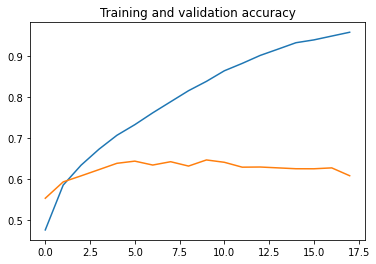

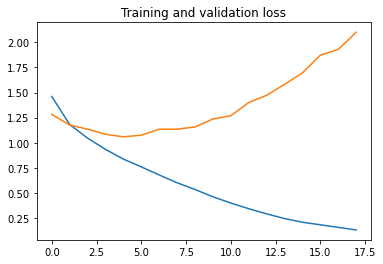

<Figure size 432x288 with 0 Axes>

In [11]:
acc_loss_plot(history1)

Training accuracy got above 95% but validation accuracy only got around 60%. Sign of overfitting. 

Next, let's build more CNN layers. 

## More CNN layer 

Adding the second convolutional and max pooling layers. 

In [12]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    MaxPooling2D((2, 2)), 
    Conv2D(32, (3, 3), activation="relu"), 
    MaxPooling2D((2, 2)), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model2.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [13]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history2 = model2.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5088 - accuracy: 0.4557 - val_loss: 1.2830 - val_accuracy: 0.5496
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1626 - accuracy: 0.5888 - val_loss: 1.1169 - val_accuracy: 0.6098
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0211 - accuracy: 0.6436 - val_loss: 1.0091 - val_accuracy: 0.6491
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9257 - accuracy: 0.6750 - val_loss: 0.9808 - val_accuracy: 0.6639
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8438 - accuracy: 0.7030 - val_loss: 0.9411 - val_accuracy: 0.6770
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7748 - accuracy: 0.7312 - val_loss: 0.9650 - val_accuracy: 0.6719
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7141 - accuracy: 0.7510 - val_loss: 0.9296 - val_accuracy:

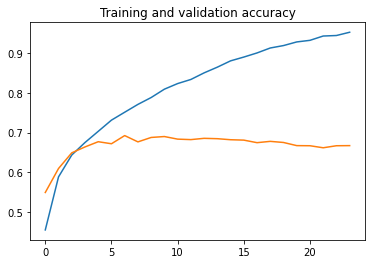

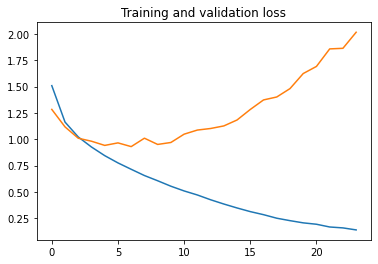

<Figure size 432x288 with 0 Axes>

In [14]:
acc_loss_plot(history2)

Validation accuracy increases about 4% from 60-61%. Adding dropout to reduce the complexity of the model. 

## Dropout 

Applying dropout layers after max pooling layers to drop some neurons. 

In [15]:
model3 = Sequential([ 
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)), 
    MaxPooling2D((2, 2)), 
    Dropout(0.25), 
    Conv2D(32, (3, 3), activation="relu"), 
    MaxPooling2D((2, 2)), 
    Dropout(0.25), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model3.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)         

In [16]:
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history3 = model3.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5808 - accuracy: 0.4250 - val_loss: 1.3125 - val_accuracy: 0.5458
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2711 - accuracy: 0.5462 - val_loss: 1.1532 - val_accuracy: 0.6033
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1465 - accuracy: 0.5918 - val_loss: 1.0873 - val_accuracy: 0.6186
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0605 - accuracy: 0.6248 - val_loss: 0.9882 - val_accuracy: 0.6612
Epoch 5/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0126 - accuracy: 0.6407 - val_loss: 0.9741 - val_accuracy: 0.6623
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9588 - accuracy: 0.6626 - val_loss: 0.9217 - val_accuracy: 0.6795
Epoch 7/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.9167 - accuracy: 0.6730 - val_loss: 0.9177 - val_accuracy:

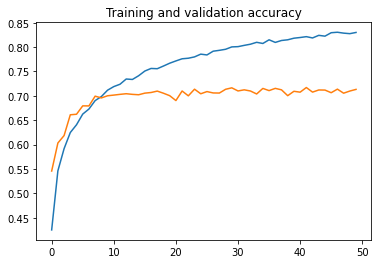

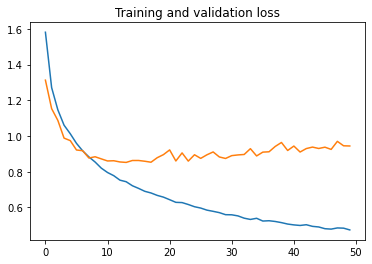

<Figure size 432x288 with 0 Axes>

In [17]:
acc_loss_plot(history3)

The accuracy seems to still increasing but the validation metrics are stabilizing but still not smooth. Let's increase the rate of dropout and increase the convolutional layers. 

## More CNN layer 

Adding the third convolutional layer. 

In [18]:
model4 = Sequential([ 
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)), 
    Conv2D(32, (3, 3), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)), 
    Dropout(0.25), 
    Conv2D(64, (3, 3), activation="relu", padding="same"), 
    Conv2D(64, (3, 3), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)), 
    Dropout(0.3), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    MaxPooling2D((2, 2)), 
    Dropout(0.4), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model4.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [19]:
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history4 = model4.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6723 - accuracy: 0.3756 - val_loss: 1.3089 - val_accuracy: 0.5190
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2521 - accuracy: 0.5471 - val_loss: 1.0685 - val_accuracy: 0.6199
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0671 - accuracy: 0.6209 - val_loss: 0.9271 - val_accuracy: 0.6739
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9532 - accuracy: 0.6615 - val_loss: 0.8499 - val_accuracy: 0.7000
Epoch 5/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8714 - accuracy: 0.6938 - val_loss: 0.7785 - val_accuracy: 0.7255
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8159 - accuracy: 0.7130 - val_loss: 0.7779 - val_accuracy: 0.7256
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7672 - accuracy: 0.7264 - val_loss: 0.7597 - val_accuracy:

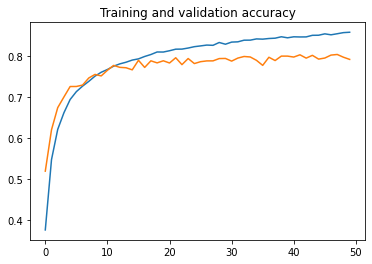

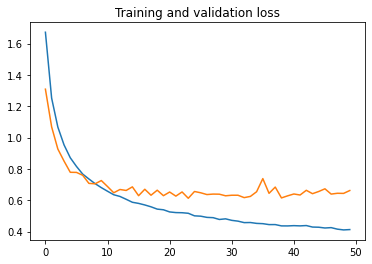

<Figure size 432x288 with 0 Axes>

In [20]:
acc_loss_plot(history4)

## Batch normalization 

Adding batch normalization after convolutional layers to stabilize validation. 

In [21]:
model5 = Sequential([ 
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)), 
    Conv2D(32, (3, 3), activation="relu", padding="same"), 
    BatchNormalization(), 
    MaxPooling2D((2, 2)), 
    Dropout(0.25), 
    Conv2D(64, (3, 3), activation="relu", padding="same"), 
    Conv2D(64, (3, 3), activation="relu", padding="same"), 
    BatchNormalization(), 
    MaxPooling2D((2, 2)), 
    Dropout(0.3), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    Conv2D(128, (3, 3), activation="relu", padding="same"), 
    BatchNormalization(), 
    MaxPooling2D((2, 2)), 
    Dropout(0.4), 
    Flatten(), 
    Dense(128, activation="relu"), 
    Dense(10, activation="softmax")
]) 

model5.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)       

In [22]:
model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy']) 
history5 = model5.fit(x_train, y_train, epochs = 50, validation_split = 0.2, shuffle=True, callbacks=[callback])

Epoch 1/50
1250/1250 [==============================] - 10s 7ms/step - loss: 1.5492 - accuracy: 0.4446 - val_loss: 1.3370 - val_accuracy: 0.5351
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1028 - accuracy: 0.6084 - val_loss: 1.0245 - val_accuracy: 0.6469
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9128 - accuracy: 0.6769 - val_loss: 1.0548 - val_accuracy: 0.6565
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8179 - accuracy: 0.7143 - val_loss: 0.8644 - val_accuracy: 0.7000
Epoch 5/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.7479 - accuracy: 0.7368 - val_loss: 0.7271 - val_accuracy: 0.7514
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6870 - accuracy: 0.7592 - val_loss: 0.7305 - val_accuracy: 0.7436
Epoch 7/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6397 - accuracy: 0.7762 - val_loss: 0.6714 - val_accuracy

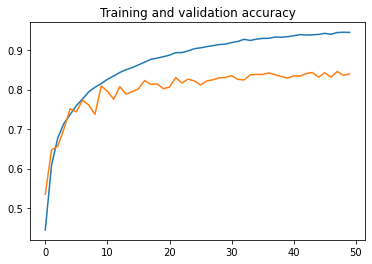

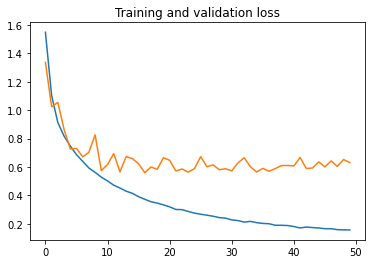

<Figure size 432x288 with 0 Axes>

In [23]:
acc_loss_plot(history5)

## Testing model on test dataset. 

In [24]:
evaluation = model5.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.6363 - accuracy: 0.8377
Test Accuracy: 0.8377000093460083


In [43]:
predictions = model5.predict(x_test) 
print('The probability of each class predicted:            ', predictions[0]) 
print('The index of predicted class (highest probability): ', np.argmax(predictions[0])) 
print('The name of the class predicted:                    ', class_names[np.argmax(predictions[0])])

The probability of each class predicted:             [1.1147935e-06 1.3971432e-08 2.1994556e-06 9.9781191e-01 1.3782494e-06
 2.1295554e-03 4.9678296e-05 3.9836796e-06 2.3520157e-07 4.5688986e-09]
The index of predicted class (highest probability):  3
The name of the class predicted:                     Cat


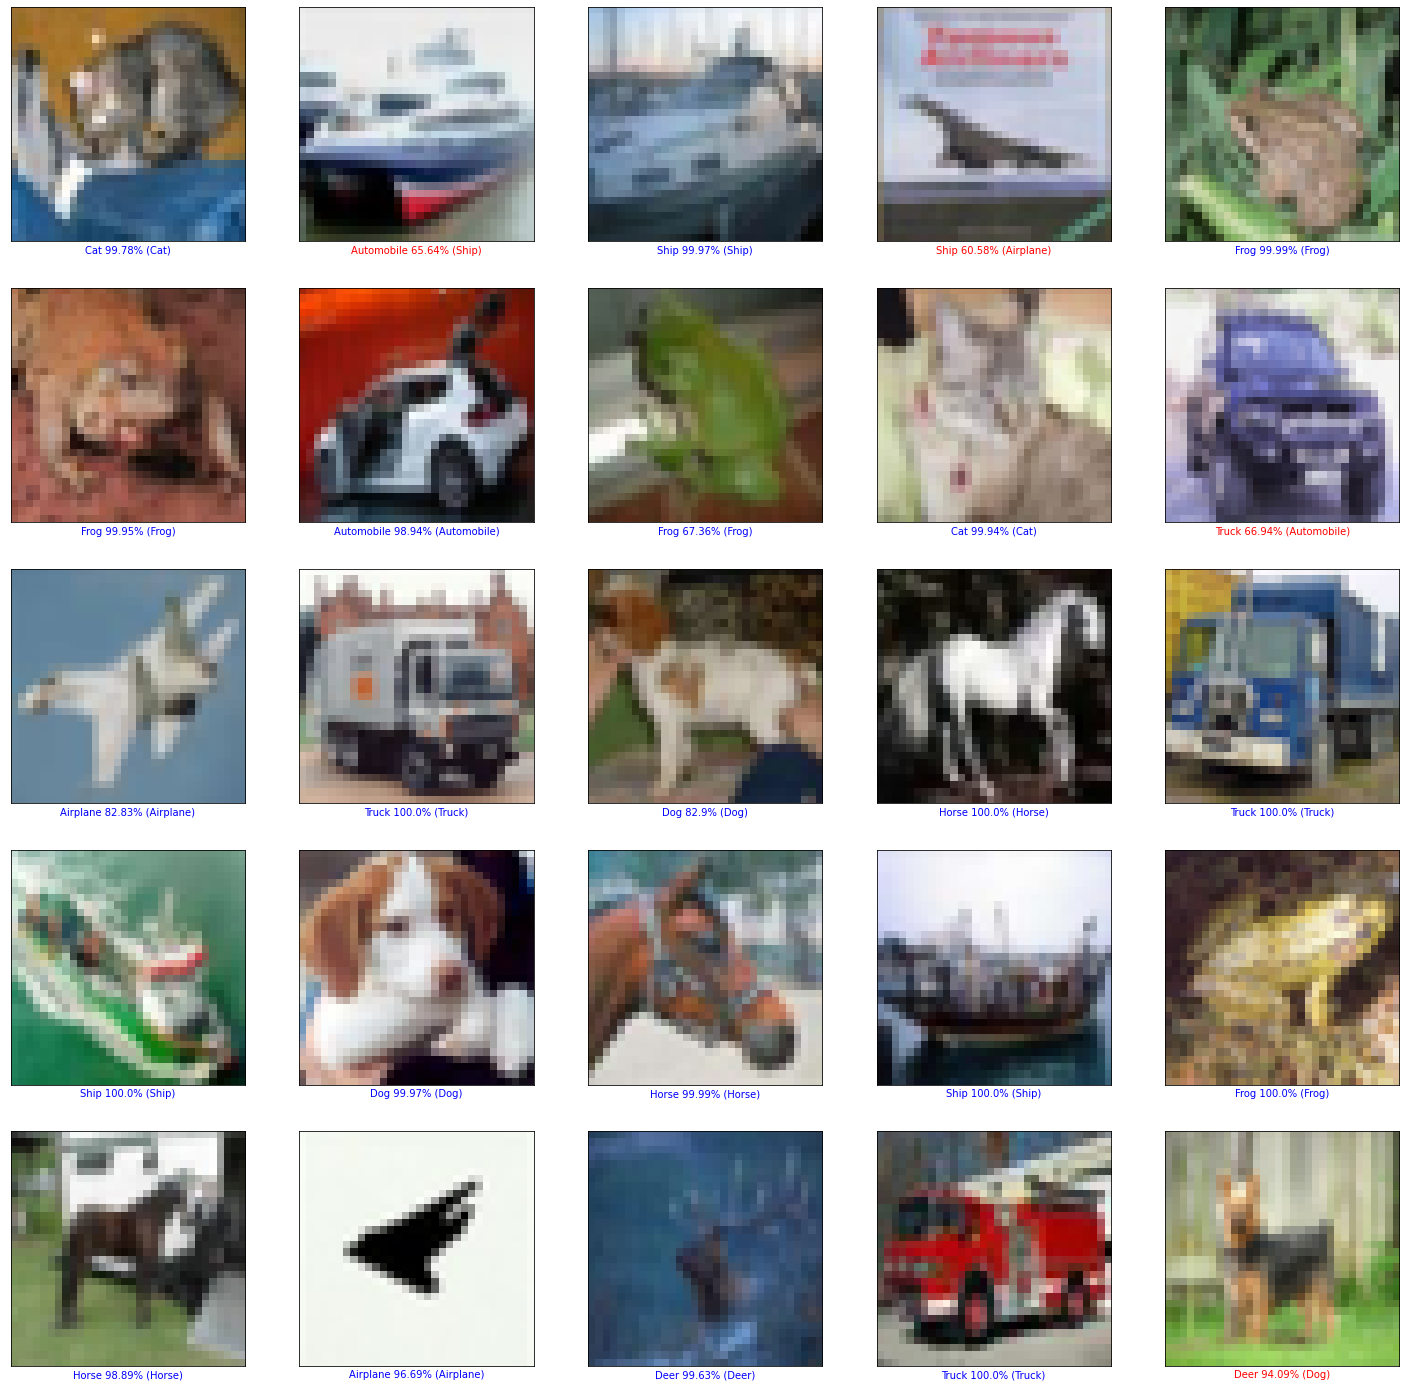

In [41]:
# Printing out the predicted classes and actual classes 
nrow = 5 
ncol = 5 

fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*5, ncol*5)) 
count = 0
for i in range(nrow): 
    for j in range(ncol): 
        current_ax = ax[i, j] 
        current_ax.grid(False) 
        current_ax.set_xticks([]) 
        current_ax.set_yticks([])
        current_ax.imshow(x_test[count]) 
        predicted_label = np.argmax(predictions[count]) 
        true_label = np.argmax(y_test[count]) 
        if predicted_label == true_label: 
            color = 'blue' 
        else: 
            color = 'red'
        current_ax.set_xlabel(f'{class_names[predicted_label]} {round(100*np.max(predictions[count]), 2)}% ({class_names[true_label]})', color = color)
        count += 1

Saving the latest model. 

In [ ]:
# final_model = model5.save('saved_model') 

Downloading the saved model. 

In [ ]:
# !zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/keras_metadata.pb (deflated 94%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/saved_model/variables/variables.index (deflated 72%)
  adding: content/saved_model/saved_model.pb (deflated 89%)
  adding: content/saved_model/assets/ (stored 0%)


In [ ]:
# from google.colab import files
# files.download("/content/saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>